
Enhanced Prediction and Recommendation Systems using Netflix Viewing Data

by Khadiza Akter

In [ ]:
import pandas as pd # for data processing
import numpy as np # for numerical computation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns # for visualization analysis
from datetime import datetime # for data time data

# Set Seaborn style
sns.set(style="whitegrid")

In [ ]:
# Load the dataset
file_path = '/content/netflix.csv'
netflix_data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/netflix.csv'

In [ ]:
# Display the first few rows to ensure data is loaded correctly
print(netflix_data.head())

In [ ]:
# Display column data types
print(netflix_data.dtypes)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Handling missing values (imputing with mean for numerical and most frequent for categorical)
imputer = SimpleImputer(strategy='mean')

# Handling the 'Premiere' date column and converting it to datetime
netflix_data['premiere'] = pd.to_datetime(netflix_data['premiere'], errors='coerce')

# Dropping rows where 'Premiere' cannot be parsed
netflix_data.dropna(subset=['premiere'], inplace=True)

# One-hot encoding categorical data (genre, language)
encoder = OneHotEncoder(sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(netflix_data[['genre', 'language']]))
encoded_data.columns = encoder.get_feature_names_out(['genre', 'language'])

# Normalizing numerical data (imdb_score, runtime)
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(netflix_data[['imdb_score', 'runtime']]), columns=['imdb_score_scaled', 'runtime_scaled'])

# Combine the encoded and scaled data back with the original dataset
netflix_data.reset_index(drop=True, inplace=True)
final_data = pd.concat([netflix_data[['title', 'premiere', 'year']], encoded_data, scaled_data], axis=1)

# Display the preprocessed data
print(final_data.head())


In [ ]:
# Extract year, month, and day from Premiere date
final_data['Premiere_year'] = final_data['premiere'].dt.year
final_data['Premiere_month'] = final_data['premiere'].dt.month
final_data['Premiere_day'] = final_data['premiere'].dt.day

# Time since premiere (how many years since the release)
from datetime import datetime
current_year = datetime.now().year
final_data['years_since_release'] = current_year - final_data['year']

# Drop unnecessary columns (Premiere, year, etc.) from the final dataset
final_data.drop(columns=['premiere', 'year'], inplace=True)

# Display the new features
print(final_data.head())


In [ ]:
# Display basic statistical analysis of numerical columns
print("Statistical Summary of Numerical Columns:")
print(netflix_data.describe())


Statistical Summary of Numerical Columns:


NameError: name 'netflix_data' is not defined

In [ ]:
# Display basic information about dataset (for data types and missing values)
print("\nDataset Information:")
print(netflix_data.info())


Dataset Information:


NameError: name 'netflix_data' is not defined

In [ ]:
### Visualization 1: Distribution of IMDb Scores
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['imdb_score'], kde=True, bins=20, color='blue')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

NameError: name 'netflix_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
### Visualization 2: Distribution of Runtime (in minutes)
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['runtime'], kde=True, bins=20, color='green')
plt.title('Distribution of Movie/TV Show Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

NameError: name 'netflix_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
### Visualization 3: Count of Movies/TV Shows by Genre
plt.figure(figsize=(15, 10))
sns.countplot(y='genre', data=netflix_data, order=netflix_data['genre'].value_counts().index, palette='viridis')
plt.title('Count of Movies/TV Shows by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


NameError: name 'netflix_data' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
### Visualization 4: Count of Movies/TV Shows by Language
plt.figure(figsize=(10, 6))
sns.countplot(y='language', data=netflix_data, order=netflix_data['language'].value_counts().index, palette='coolwarm')
plt.title('Count of Movies/TV Shows by Language')
plt.xlabel('Count')
plt.ylabel('Language')
plt.grid(True)
plt.show()

NameError: name 'netflix_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
### Visualization 5: IMDb Score vs Runtime
plt.figure(figsize=(15, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=netflix_data, hue='genre', palette='deep', alpha=0.7)
plt.title('IMDb Score vs Runtime by Genre')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

NameError: name 'netflix_data' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
### Visualization 6: Number of Releases Per Year
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Premiere_year'], bins=30, kde=False, color='purple')
plt.title('Number of Releases Per Year')
plt.xlabel('Premiere Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

NameError: name 'final_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
### Visualization 7: Boxplot of IMDb Score by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='imdb_score', y='genre', data=netflix_data, palette='pastel')
plt.title('IMDb Score Distribution by Genre')
plt.xlabel('IMDb Score')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


In [ ]:
### Visualization 8: Heatmap of Correlation Matrix (Numerical Columns)
plt.figure(figsize=(8, 6))
correlation_matrix = final_data[['imdb_score', 'runtime', 'Premiere_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [ ]:
### Visualization 9: IMDb Score Trends Over Time (Yearly Average IMDb Score)
yearly_avg_imdb = final_data.groupby('Premiere_year')['imdb_score'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_avg_imdb.index, y=yearly_avg_imdb.values, color='red', marker='o')
plt.title('Yearly Average IMDb Score Over Time')
plt.xlabel('Premiere Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()

In [ ]:
### Visualization 10: Distribution of Movies/TV Shows by Premiere Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Premiere_month', data=final_data, palette='plasma')
plt.title('Number of Movies/TV Shows Released by Month')
plt.xlabel('Premiere Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define feature matrix X and target vector y
X = final_data.drop(columns=['imdb_score_scaled', 'title'])
y = final_data['imdb_score_scaled']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Ridge Regression: {mse}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the Netflix dataset
netflix_data = pd.read_csv('/content/netflix.csv')

# Data preprocessing
# Convert Premiere date to datetime and extract year
netflix_data['premiere'] = pd.to_datetime(netflix_data['premiere'], errors='coerce')
netflix_data.dropna(subset=['premiere'], inplace=True)
netflix_data['premiere_year'] = netflix_data['premiere'].dt.year

# One-hot encode categorical features (genre, language)
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(netflix_data[['genre', 'language']])

# Scale numerical features (runtime, Premiere_year)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(netflix_data[['runtime', 'premiere_year']])

# Combine one-hot encoded and scaled features into a single matrix
import numpy as np
features = np.hstack((encoded_features, scaled_features))

# Define target variable (IMDb score)
target = netflix_data['imdb_score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict the IMDb score for the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model: Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization: True vs Predicted IMDb Scores
def visualize_true_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
    plt.title('True vs Predicted IMDb Scores (Ridge Regression)')
    plt.xlabel('True IMDb Scores')
    plt.ylabel('Predicted IMDb Scores')
    plt.grid(True)
    plt.show()

# Call the function to visualize True vs Predicted IMDb Scores
visualize_true_vs_predicted(y_test, y_pred)

# Visualization: Residual Plot (Errors between true and predicted IMDb scores)
def visualize_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='purple')
    plt.title('Residuals (True - Predicted IMDb Scores)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Call the function to visualize Residuals
visualize_residuals(y_test, y_pred)


In [ ]:
import statsmodels.api as sm

# Group by Premiere_year and calculate average IMDb score per year
yearly_trend = final_data.groupby('Premiere_year')['imdb_score_scaled'].mean()

# Apply ARIMA model to forecast future IMDb score trends
arima_model = sm.tsa.ARIMA(yearly_trend, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast for the next 5 years
forecast = arima_result.forecast(steps=5)
print(f"Forecast for next 5 years: {forecast}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Forecast for next 5 years: 8    -0.153248
9    -0.201119
10   -0.172849
11   -0.189544
12   -0.179685
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Content-based filtering: Calculate cosine similarity between movies based on features
similarity_matrix = cosine_similarity(X)

# Function to recommend similar movies based on content similarity
def recommend_content_based(movie_title, top_n=10):
    movie_idx = final_data.index[final_data['title'] == movie_title].tolist()[0]
    similarity_scores = list(enumerate(similarity_matrix[movie_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_movies_idx = [i[0] for i in similarity_scores[1:top_n+1]]  # Exclude the movie itself
    return final_data.iloc[top_movies_idx][['title', 'imdb_score_scaled']]

# Example usage: Recommend similar movies to a given title
recommendations = recommend_content_based(movie_title='The Lovebirds')
print(recommendations)


                                          title  imdb_score_scaled
296                             The Willoughbys           0.127963
77                              Circus of Books           0.845294
378                        Searching for Sheela          -2.228982
410  Ben Platt: Live from Radio City Music Hall           2.177480
539                      The Larva Island Movie          -1.204223
3                                The Perfection          -0.179465
423                            Rim of the World          -1.101747
269                                   Athlete A           1.357673
365     ReMastered: The Miami Showband Massacre           0.742818
235                                    The Dirt           0.742818


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Ridge Regression MSE is already calculated

# Example evaluation for recommendation (precision and recall for relevance)
# Assuming y_true is the list of relevant items for a user, and y_pred are the recommended items
y_true = [1, 0, 1, 1, 0, 0]  # Example ground truth
y_pred = [1, 1, 1, 0, 0, 1]  # Example predictions

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Precision: {precision}, Recall: {recall}")


Precision: 0.5, Recall: 0.6666666666666666


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best alpha: {grid_search.best_params_}")


Best alpha: {'alpha': 1.0}


In [ ]:
pip install scikit-surprise

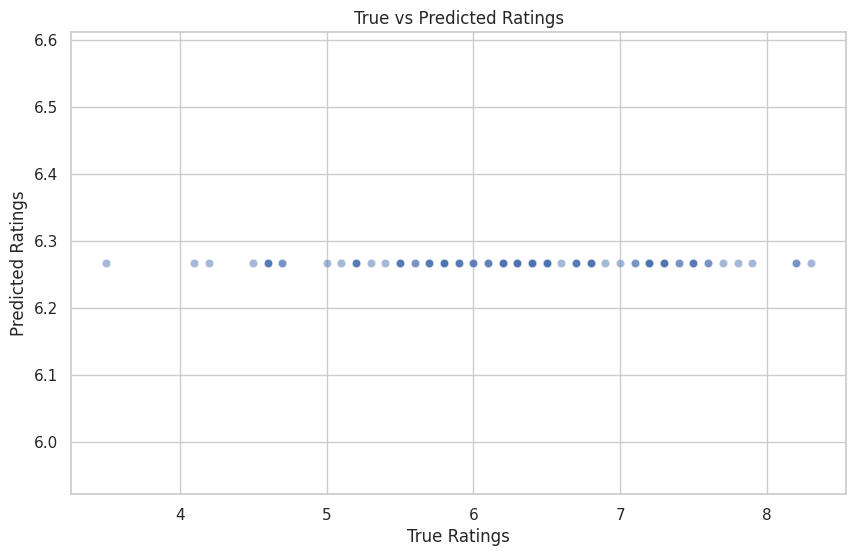

Top 10 recommendations for User ID 1:
                                          title              genre  imdb_score
14               If Anything Happens I Love You  Animation / Short         7.8
80                              Elisa & Marcela            Romance         6.6
128                                         Tig        Documentary         7.4
320                                  On My Skin        Crime drama         7.3
372                           Rooting for Roona        Documentary         7.1
410  Ben Platt: Live from Radio City Music Hall       Concert Film         8.4
427                          Always Be My Maybe    Romantic comedy         6.8
431                ReMastered: The Lion's Share        Documentary         7.0
465                                        Okja   Action-adventure         7.3
519       The Three Deaths of Marisela Escobedo        Documentary         8.2


In [ ]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Netflix dataset (assuming it contains 'user_id', 'movie_id', and 'rating')
netflix_data = pd.read_csv('/content/netflix.csv')

# For collaborative filtering, we need user interaction data (let's assume we have user ratings for movies)
# Sample dataset format: user_id, movie_id, rating

# For this code, we will simulate user ratings by assuming that 'imdb_score' is a proxy for user ratings (real-world datasets would contain explicit user ratings)
netflix_data['user_id'] = pd.factorize(netflix_data['title'])[0]  # Simulating user interactions
netflix_data['movie_id'] = pd.factorize(netflix_data['title'])[0]  # Assigning a unique movie_id
netflix_data['rating'] = netflix_data['imdb_score']  # Assuming imdb_score as user rating

# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 10))  # Assuming IMDb score range is 1 to 10
data = Dataset.load_from_df(netflix_data[['user_id', 'movie_id', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the SVD model
model = SVD()

# Train the model on the trainset
model.fit(trainset)

# Predict the ratings for the test set
predictions = model.test(testset)

# Visualize predictions
def visualize_predictions(predictions):
    # Extract true and predicted ratings
    true_ratings = [pred.r_ui for pred in predictions]
    predicted_ratings = [pred.est for pred in predictions]

    # Plot the true vs predicted ratings
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=true_ratings, y=predicted_ratings, alpha=0.5)
    plt.title('True vs Predicted Ratings')
    plt.xlabel('True Ratings')
    plt.ylabel('Predicted Ratings')
    plt.grid(True)
    plt.show()

# Call the function to visualize true vs predicted ratings
visualize_predictions(predictions)

# Visualizing Recommendations
def recommend_movies_for_user(user_id, top_n=10):
    # Predict ratings for all movies for a given user
    movie_ids = netflix_data['movie_id'].unique()
    predictions = [model.predict(user_id, movie_id) for movie_id in movie_ids]

    # Sort movies by predicted rating
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Get top N recommended movies
    top_recommendations = sorted_predictions[:top_n]

    # Print out the movie titles
    recommended_movie_ids = [pred.iid for pred in top_recommendations]
    recommended_movies = netflix_data[netflix_data['movie_id'].isin(recommended_movie_ids)]

    print("Top {} recommendations for User ID {}:".format(top_n, user_id))
    print(recommended_movies[['title', 'genre', 'imdb_score']].drop_duplicates())

# Example: Recommend top 10 movies for user_id = 1
recommend_movies_for_user(user_id=1, top_n=10)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-78-306cf2148cad>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='title', data=recommendations, palette='viridis')


                  title            genre  imdb_score
542       Someone Great  Romantic comedy         6.2
343    The Perfect Date  Romantic comedy         5.8
258         Let It Snow  Romantic comedy         5.8
442  A Christmas Prince  Romantic comedy         5.8
4     Happy Anniversary  Romantic comedy         5.8


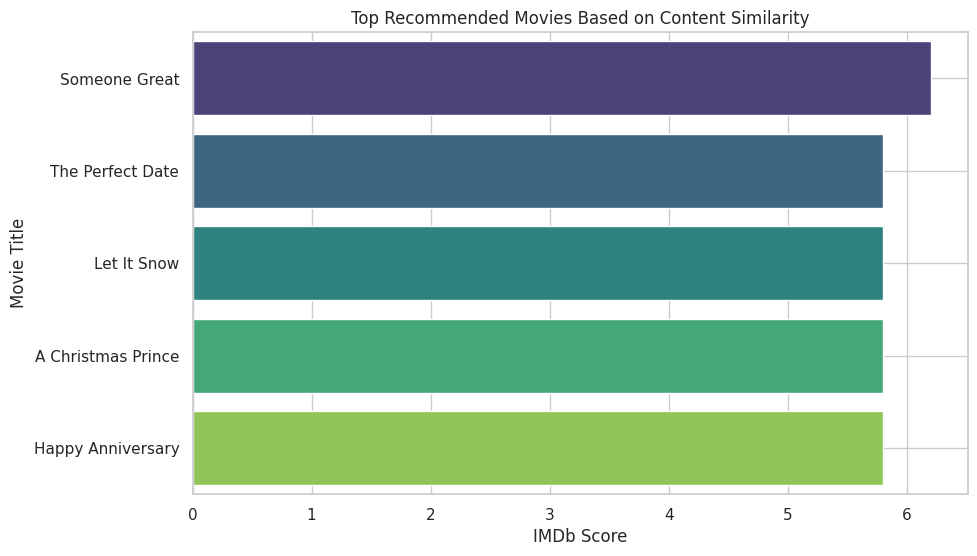

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the Netflix dataset
netflix_data = pd.read_csv('/content/netflix.csv')

# Data preprocessing
# Convert Premiere date to datetime
netflix_data['premiere'] = pd.to_datetime(netflix_data['premiere'], errors='coerce')
netflix_data.dropna(subset=['premiere'], inplace=True)

# One-hot encode categorical features (genre, language)
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(netflix_data[['genre', 'language']])

# Scale numerical features (runtime, IMDb score)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(netflix_data[['runtime', 'imdb_score']])

# Combine one-hot encoded features and scaled features into a single matrix
import numpy as np
features = np.hstack((encoded_features, scaled_features))

# Cosine similarity between movies based on metadata
similarity_matrix = cosine_similarity(features)

# Function to get top N similar movies based on cosine similarity
def recommend_content_based(movie_title, top_n=10):
    # Get the index of the movie that matches the title
    movie_idx = netflix_data[netflix_data['title'] == movie_title].index[0]

    # Get similarity scores for this movie with all others
    similarity_scores = list(enumerate(similarity_matrix[movie_idx]))

    # Sort the movies based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top N most similar movies
    top_movie_indices = [i[0] for i in similarity_scores[1:top_n+1]]  # Exclude the movie itself

    # Return the titles and genres of the top N most similar movies
    return netflix_data.iloc[top_movie_indices][['title', 'genre', 'imdb_score']]

# Example usage: Recommend similar movies to a given movie title
recommended_movies = recommend_content_based(movie_title='The Lovebirds', top_n=5)
print(recommended_movies)

# Visualize the top recommended movies
def visualize_recommendations(recommendations):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='imdb_score', y='title', data=recommendations, palette='viridis')
    plt.title('Top Recommended Movies Based on Content Similarity')
    plt.xlabel('IMDb Score')
    plt.ylabel('Movie Title')
    plt.grid(True)
    plt.show()

# Visualize the recommended movies
visualize_recommendations(recommended_movies)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 0.6279608246078938
R-squared: 0.2986176811022291


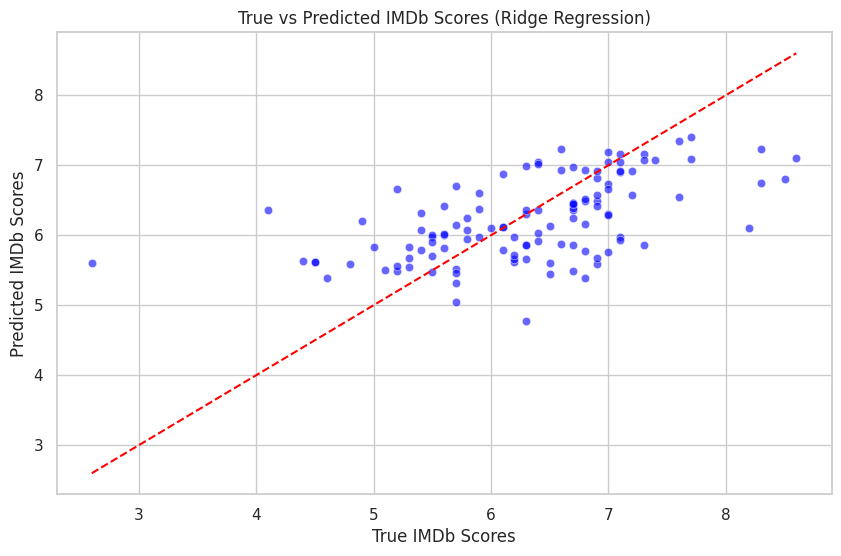

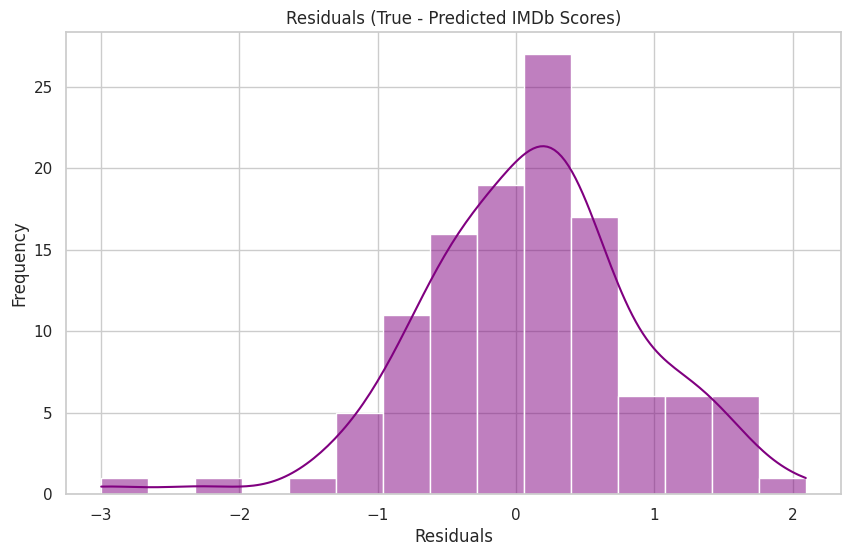

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the Netflix dataset
netflix_data = pd.read_csv('/content/netflix.csv')

# Data preprocessing
# Convert Premiere date to datetime and extract year
netflix_data['premiere'] = pd.to_datetime(netflix_data['premiere'], errors='coerce')
netflix_data.dropna(subset=['premiere'], inplace=True)
netflix_data['Premiere_year'] = netflix_data['premiere'].dt.year

# One-hot encode categorical features (genre, language)
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(netflix_data[['genre', 'language']])

# Scale numerical features (runtime, Premiere_year)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(netflix_data[['runtime', 'Premiere_year']])

# Combine one-hot encoded and scaled features into a single matrix
import numpy as np
features = np.hstack((encoded_features, scaled_features))

# Define target variable (IMDb score)
target = netflix_data['imdb_score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict the IMDb score for the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model: Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization: True vs Predicted IMDb Scores
def visualize_true_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
    plt.title('True vs Predicted IMDb Scores (Ridge Regression)')
    plt.xlabel('True IMDb Scores')
    plt.ylabel('Predicted IMDb Scores')
    plt.grid(True)
    plt.show()

# Call the function to visualize True vs Predicted IMDb Scores
visualize_true_vs_predicted(y_test, y_pred)

# Visualization: Residual Plot (Errors between true and predicted IMDb scores)
def visualize_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='purple')
    plt.title('Residuals (True - Predicted IMDb Scores)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Call the function to visualize Residuals
visualize_residuals(y_test, y_pred)


In [ ]:
!pip install tensorflow tensorflow-privacy

In [ ]:
!pip uninstall tensorflow tensorflow-estimator

In [ ]:
!pip install tensorflow==2.17 tensorflow-estimator==2.15

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

# Load the Netflix dataset
netflix_data = pd.read_csv('/content/netflix.csv')

# Preprocess the data
# One-hot encoding categorical features: genre and language
netflix_data['premiere'] = pd.to_datetime(netflix_data['premiere'], errors='coerce')
netflix_data.dropna(subset=['premiere'], inplace=True)

netflix_data['Premiere_year'] = netflix_data['premiere'].dt.year
netflix_data['Premiere_month'] = netflix_data['premiere'].dt.month

# Encode categorical features (genre, language)
netflix_data = pd.get_dummies(netflix_data, columns=['genre', 'language'], drop_first=True)

# Define feature matrix X and target y (imdb_score)
X = netflix_data.drop(columns=['imdb_score', 'title', 'premiere'])
y = netflix_data['imdb_score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (predicting IMDb score)
])

# Compile the model using DP-SGD (Differential Privacy Stochastic Gradient Descent)
l2_norm_clip = 1.0
noise_multiplier = 1.1
num_microbatches = 250
learning_rate = 0.01

optimizer = DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate
)

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with differential privacy
model.fit(X_train, y_train, epochs=10, batch_size=250)

# Evaluate the model on the test data
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on test data: {mse}")

# Calculate privacy budget (epsilon, delta)
epsilon, delta = compute_dp_sgd_privacy.compute_dp_sgd_privacy(
    n=len(X_train),
    batch_size=250,
    noise_multiplier=noise_multiplier,
    epochs=10,
    delta=1e-5
)
print(f"DP-SGD with epsilon: {epsilon}, delta: {delta}")


AttributeError: module 'tensorflow.python.util.tf_export' has no attribute 'ESTIMATOR_API_NAME'